In [4]:
import sys
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



# Load environment variables

In [5]:
load_dotenv()
user = os.environ['PG_USER']
password = os.environ['PG_PASSWORD']
host = os.environ['PG_HOST']
port = os.environ['PG_PORT']
database = os.environ['PG_DATABASE']

# Connect database

In [6]:
def connect():
    conn = None
    try:
        print('Connecting..')
        conn = psycopg2.connect(
              host=host,
              database=database,
              user=user,
              password=password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)   
        
    print("All good, Connection successful!")
    return conn

In [7]:
def sql_to_dataframe(conn, query):
    """Import data from a PostgreSQL database using a SELECT query"""
    cursor = conn.cursor()   
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:   
    tuples_list = cursor.fetchall()   
    
    # Now we need to transform the list into a pandas DataFrame:   
    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()   
    return df

In [8]:
# create query
query = """ SELECT * FROM public.xdr_data  """

#opening the connection
conn = connect()

#loading our dataframe
df = sql_to_dataframe(conn, query)

#closing the connection
conn.close()

Connecting..
All good, Connection successful!


In [9]:
df.sample(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
23373,1.268214e+19,4/24/2019 20:45,836.0,4/24/2019 23:04,855.0,8290.0,2.082019e+14,3.365923e+10,3.590391e+13,G83885C,...,10428261.0,6081907.0,13386903.0,17408111.0,399563539.0,5766384.0,155967344.0,6932733.0,37753053.0,437006349.0
90492,7.277826e+18,4/27/2019 14:25,839.0,4/28/2019 0:39,265.0,36879.0,2.082014e+14,3.365032e+10,3.573661e+13,T15788A,...,11008213.0,4813194.0,23213966.0,10623964.0,265123220.0,12035109.0,163335383.0,5454997.0,37625350.0,306347020.0
38295,7.277826e+18,4/25/2019 2:47,365.0,4/26/2019 1:11,903.0,80612.0,2.082019e+14,NaN,8.639550e+13,D48263B,...,13567633.0,17504806.0,9313403.0,1881099.0,778575470.0,12420604.0,141819706.0,8439567.0,41447611.0,811239767.0
72462,1.311448e+19,4/26/2019 8:41,72.0,4/27/2019 21:58,300.0,134195.0,2.082009e+14,3.366874e+10,3.546071e+13,L50256A,...,58673.0,6642752.0,8696115.0,20131213.0,446829512.0,2863294.0,517586827.0,417840.0,33428337.0,463895367.0
101750,7.277826e+18,4/26/2019 15:34,600.0,4/29/2019 9:36,952.0,237722.0,2.082019e+14,3.366475e+10,3.552301e+13,D54315B,...,5309169.0,17082412.0,21090732.0,12933363.0,74506633.0,1890348.0,791430533.0,4219552.0,37284522.0,104288403.0
131296,1.311448e+19,4/28/2019 12:57,595.0,4/30/2019 11:50,266.0,168794.0,2.082021e+14,3.365991e+10,3.590401e+13,T42046B,...,4173499.0,14128794.0,16098644.0,18618068.0,796094597.0,13626747.0,290447215.0,12606261.0,60258266.0,827162723.0
124820,1.304243e+19,4/28/2019 6:17,362.0,4/29/2019 6:17,295.0,86399.0,2.082017e+14,3.368779e+10,3.586081e+13,D21107C,...,22844180.0,9653012.0,4548671.0,7323703.0,723888651.0,16273130.0,381445345.0,11618179.0,49661110.0,757697790.0
142195,1.304243e+19,4/29/2019 4:24,560.0,4/30/2019 4:24,527.0,86399.0,2.082019e+14,3.376169e+10,8.637690e+13,T29840B,...,22061816.0,13542771.0,7337815.0,4451514.0,827214908.0,4757098.0,492820460.0,786732.0,24523898.0,870726079.0
102687,7.349883e+18,4/26/2019 19:08,432.0,4/29/2019 10:46,35.0,229087.0,2.082014e+14,3.366073e+10,3.561391e+13,D12386A,...,6928141.0,19605534.0,16356919.0,704183.0,134868771.0,236836.0,354599812.0,10343245.0,33611033.0,170662803.0
78559,1.304243e+19,4/27/2019 4:11,405.0,4/28/2019 0:05,540.0,71625.0,2.082015e+14,3.363839e+10,8.662480e+13,L72024C,...,1286015.0,18298883.0,6758957.0,4372609.0,42268414.0,15213369.0,348343860.0,10755050.0,50557025.0,64076343.0


# Sqlalchemy

In [9]:
def data_from_postgres(query):
    # Create the URI
    uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
    
    # Create the engine
    try:
        alchemyEngine = create_engine(uri)
        
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)
    print("Engine created!")        
    # Connect to PostgreSQL server
    try:
        dbConnection = alchemyEngine.connect()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)

    print("Connection established")
    df = pd.read_sql(query, dbConnection)
    # Close connection
    dbConnection.close()

    return df

In [10]:
# create query
query = """ SELECT * FROM public.xdr_data  """

In [11]:
df = data_from_postgres(query)

Engine created!
Connection established


In [12]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [14]:
# Convert data types
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [11]:
# Group data by handset type and count usage
top_handsets = df['Handset Type'].value_counts()

# Sort handsets by usage count in descending order
top_handsets = top_handsets.sort_values(ascending=False)

# Select top 10 handsets
top_10_handsets = top_handsets.head(10)

# Display the top 10 handsets
print("Top 10 Handsets:")
top_10_handsets


Top 10 Handsets:


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

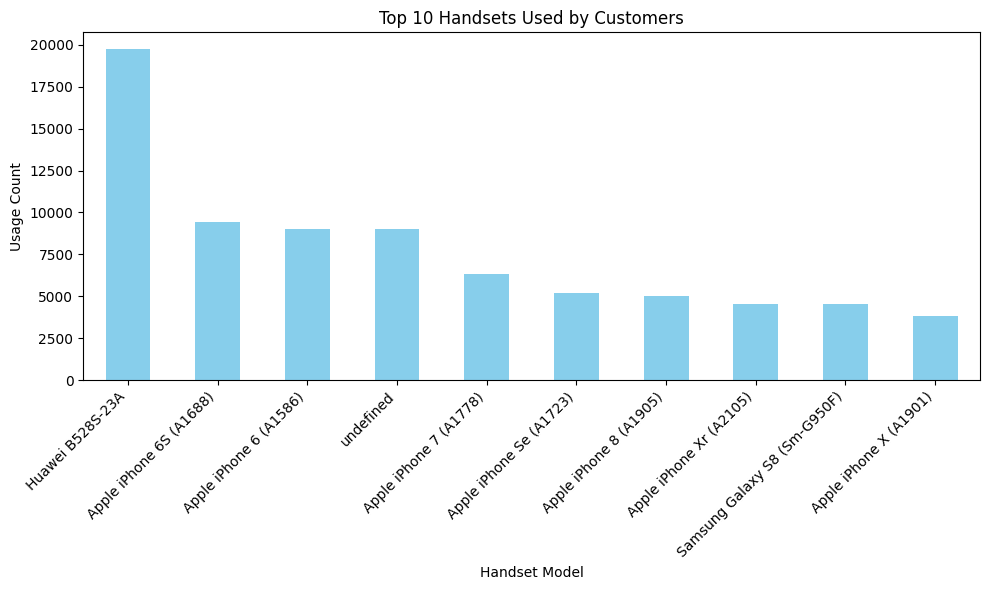

In [12]:
# Create a bar plot for the top 10 handsets
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Model')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Extract manufacturer information from the 'Handset Type' column
df['Manufacturer'] = df['Handset Type'].str.split().str[0]

# Group data by manufacturer and count usage
top_manufacturers = df['Manufacturer'].value_counts()

# Sort manufacturers by usage count in descending order
top_manufacturers = top_manufacturers.sort_values(ascending=False)

# Select top 3 manufacturers
top_3_manufacturers = top_manufacturers.head(3)

# Display the top 3 manufacturers
print("Top 3 Handset Manufacturers:")
top_3_manufacturers


Top 3 Handset Manufacturers:


Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

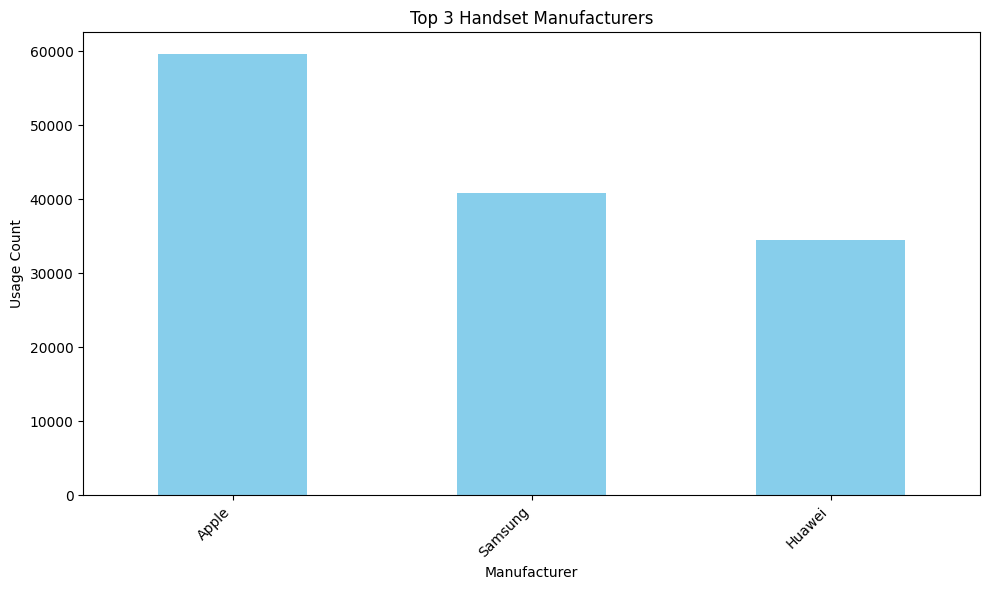

In [19]:
# Create a bar plot for the top 3 handset manufacturers
plt.figure(figsize=(10, 6))
top_3_manufacturers.plot(kind='bar', color='skyblue')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Filter data by top 3 manufacturers
top_3_manufacturer_data = df[df['Manufacturer'].isin(top_3_manufacturers.index)]

# Group data by handset model and manufacturer, and count usage
top_5_handsets_per_manufacturer = top_3_manufacturer_data.groupby(['Manufacturer', 'Handset Type']).size()

# Sort handsets by usage per manufacturer
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer.groupby('Manufacturer').nlargest(5).reset_index(level=0, drop=True)

# Display the top 5 handsets per manufacturer
print("Top 5 Handsets per Top 3 Handset Manufacturers:")
top_5_handsets_per_manufacturer


Top 5 Handsets per Top 3 Handset Manufacturers:


Manufacturer  Handset Type                  
Apple         Apple iPhone 6S (A1688)            9419
              Apple iPhone 6 (A1586)             9023
              Apple iPhone 7 (A1778)             6326
              Apple iPhone Se (A1723)            5187
              Apple iPhone 8 (A1905)             4993
Huawei        Huawei B528S-23A                  19752
              Huawei E5180                       2079
              Huawei P20 Lite Huawei Nova 3E     2021
              Huawei P20                         1480
              Huawei Y6 2018                      997
Samsung       Samsung Galaxy S8 (Sm-G950F)       4520
              Samsung Galaxy A5 Sm-A520F         3724
              Samsung Galaxy J5 (Sm-J530)        3696
              Samsung Galaxy J3 (Sm-J330)        3484
              Samsung Galaxy S7 (Sm-G930X)       3199
dtype: int64

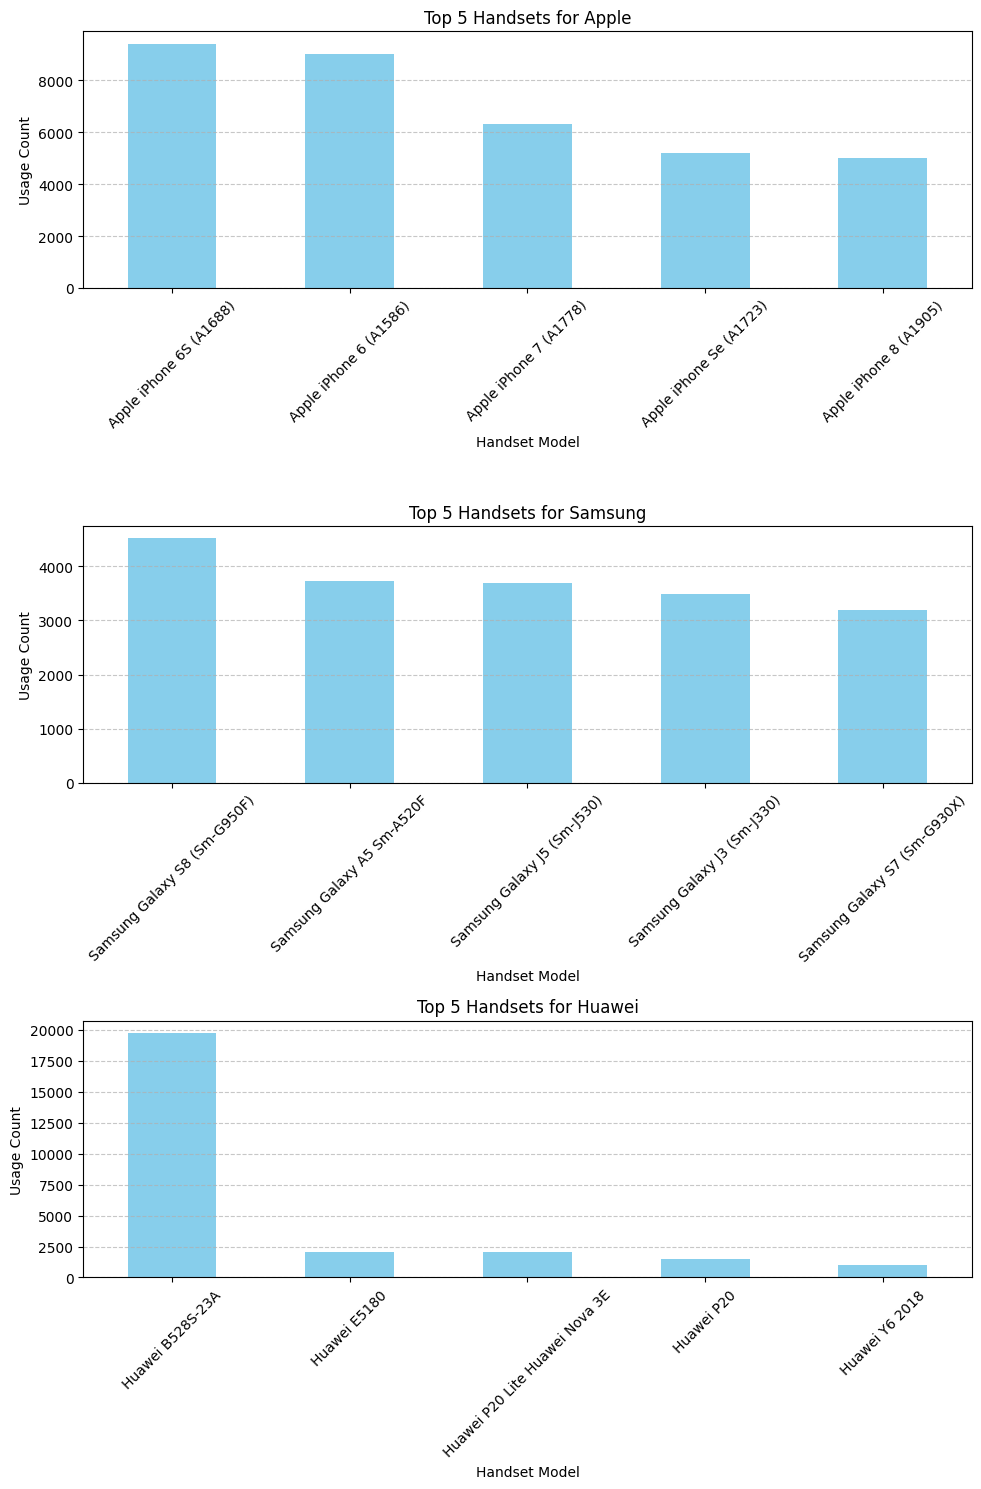

In [21]:
# Create a figure with subplots for each manufacturer
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Iterate over the top 3 manufacturers
for i, manufacturer in enumerate(top_3_manufacturers.index):
    # Filter data for the current manufacturer
    manufacturer_data = top_3_manufacturer_data[top_3_manufacturer_data['Manufacturer'] == manufacturer]
    # Group data by handset model and count usage
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    # Plot bar chart for top 5 handsets for the current manufacturer
    top_5_handsets.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Top 5 Handsets for {manufacturer}')
    axes[i].set_xlabel('Handset Model')
    axes[i].set_ylabel('Usage Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [22]:
# Assuming 'MSISDN/Number' is the unique identifier for each user
# Group the data by 'MSISDN/Number' and count the occurrences of xDR sessions for each user
sessions_per_user = df.groupby('MSISDN/Number')['Bearer Id'].count()

# Display the aggregated number of xDR sessions per user
sessions_per_user

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64

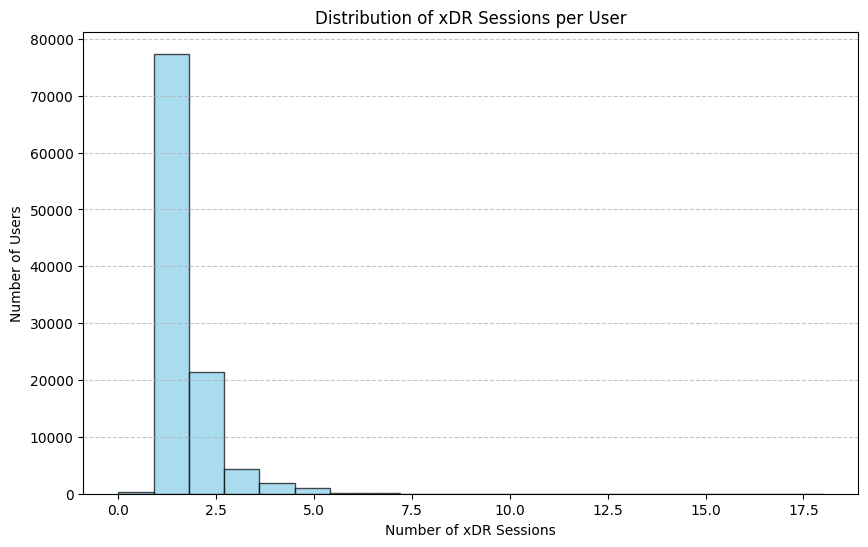

In [23]:
# Create a histogram to visualize the distribution of xDR sessions per user
plt.figure(figsize=(10, 6))
plt.hist(sessions_per_user, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of xDR Sessions per User')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# Assuming 'MSISDN/Number' is the unique identifier for each user
# Group the data by 'MSISDN/Number' and sum the session durations for each user
session_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Display the aggregated session duration per user
session_duration_per_user

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

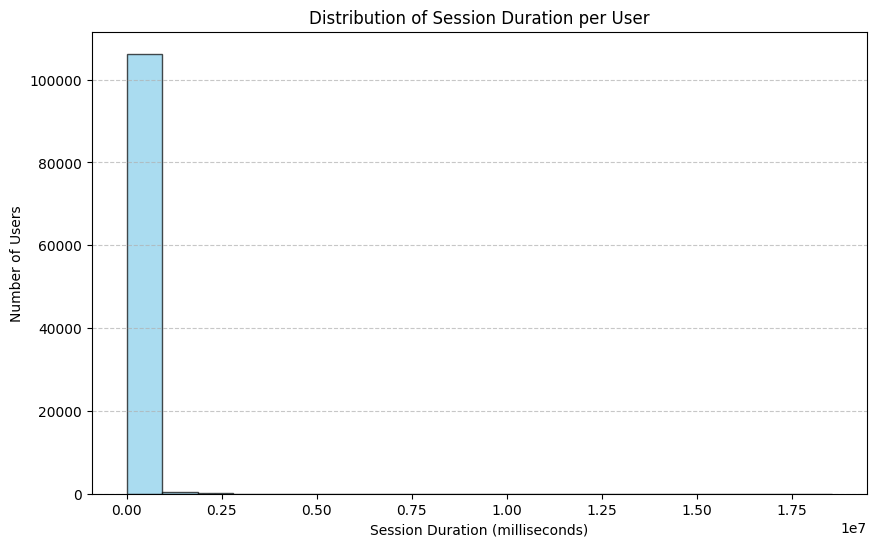

In [25]:
# Create a histogram to visualize the distribution of session durations per user
plt.figure(figsize=(10, 6))
plt.hist(session_duration_per_user, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Session Duration per User')
plt.xlabel('Session Duration (milliseconds)')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Group the data by 'MSISDN/Number' and sum the download (DL) and upload (UL) data for each user
total_data_per_user = df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Display the aggregated total download (DL) and upload (UL) data per user
print(total_data_per_user)

               Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                    
3.360100e+10       8.426375e+08        36053108.0
3.360100e+10       1.207552e+08        36104459.0
3.360100e+10       5.566597e+08        39306820.0
3.360101e+10       4.019932e+08        20327526.0
3.360101e+10       1.363130e+09        94280527.0
...                         ...               ...
3.379000e+10       6.879252e+08        26716429.0
3.379000e+10       4.445751e+08        35732243.0
3.197021e+12       1.948281e+08        37295915.0
3.370000e+14       5.396350e+08        56652839.0
8.823971e+14       7.869760e+07        60456049.0

[106856 rows x 2 columns]


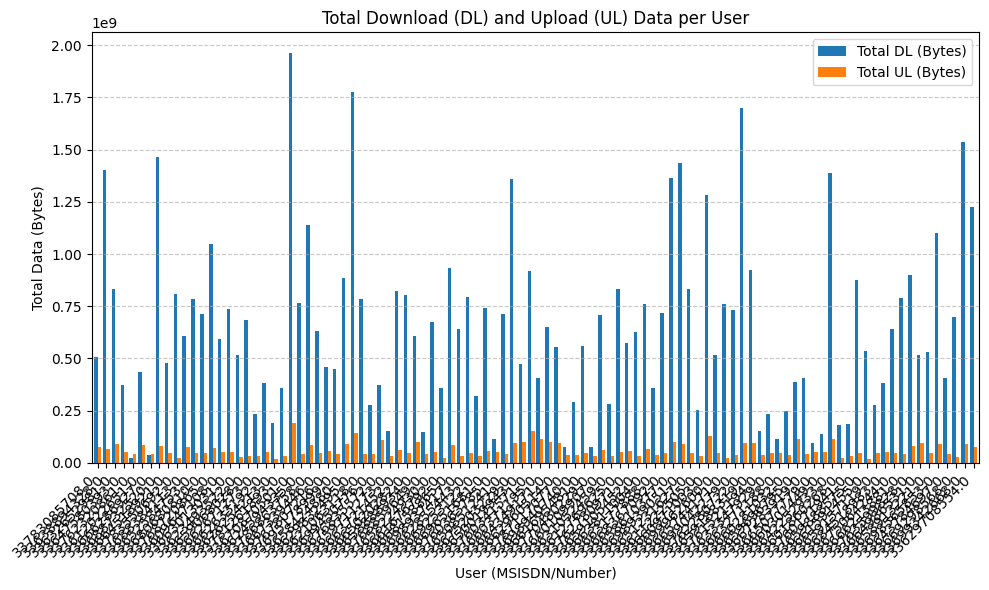

In [27]:
# Create a bar plot to visualize the total download (DL) and upload (UL) data per user
total_data_per_user.sample(100).plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Total Download (DL) and Upload (UL) Data per User')
plt.xlabel('User (MSISDN/Number)')
plt.ylabel('Total Data (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Total DL (Bytes)', 'Total UL (Bytes)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Aggregate engagement metrics per customer (MSISDN/Number)
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Session frequency
    'Dur. (ms)': 'sum',  # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download df
    'Total UL (Bytes)': 'sum'  # Total upload df
})

# Rename columns for clarity
engagement_metrics.rename(columns={
    'Bearer Id': 'Session Frequency',
    'Dur. (ms)': 'Total Session Duration',
    'Total DL (Bytes)': 'Total Download df',
    'Total UL (Bytes)': 'Total Upload df'
}, inplace=True)

# Add a total traffic column
engagement_metrics['Total Traffic'] = (
    engagement_metrics['Total Download df'] + engagement_metrics['Total Upload df']
)

# Check top 10 customers per engagement metric
print("Top 10 Customers by Session Frequency:")
print(engagement_metrics['Session Frequency'].sort_values(ascending=False).head(10))

print("Top 10 Customers by Total Session Duration:")
print(engagement_metrics['Total Session Duration'].sort_values(ascending=False).head(10))

print("Top 10 Customers by Total Traffic:")
print(engagement_metrics['Total Traffic'].sort_values(ascending=False).head(10))

Top 10 Customers by Session Frequency:
MSISDN/Number
3.362632e+10    18
3.362578e+10    17
3.361489e+10    17
3.365973e+10    16
3.367588e+10    15
3.376054e+10    15
3.366716e+10    13
3.376041e+10    12
3.360452e+10    12
3.360313e+10    12
Name: Session Frequency, dtype: int64
Top 10 Customers by Total Session Duration:
MSISDN/Number
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.362632e+10     8791927.0
3.366716e+10     8744914.0
3.366284e+10     6614270.0
3.366469e+10     6288730.0
3.360313e+10     6287761.0
3.366746e+10     5649882.0
3.376041e+10     5321667.0
Name: Total Session Duration, dtype: float64
Top 10 Customers by Total Traffic:
MSISDN/Number
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09
3.369879e+10    6.540899e+09
Name: T

Cluster Statistics:
                   Session Frequency                       \
                                 min max      mean    sum   
Engagement Cluster                                          
0                                  0   4  2.177989  48922   
1                                  0   2  1.030702  83056   
2                                  2  18  4.335782  16528   

                   Total Session Duration                             \
                                      min         max           mean   
Engagement Cluster                                                     
0                                 18235.0   1698167.0  213348.034903   
1                                  7142.0   1573420.0  105093.509009   
2                                 66594.0  18553754.0  618564.783054   

                                 Total Traffic                              \
                             sum           min           max          mean   
Engagement Cluster      

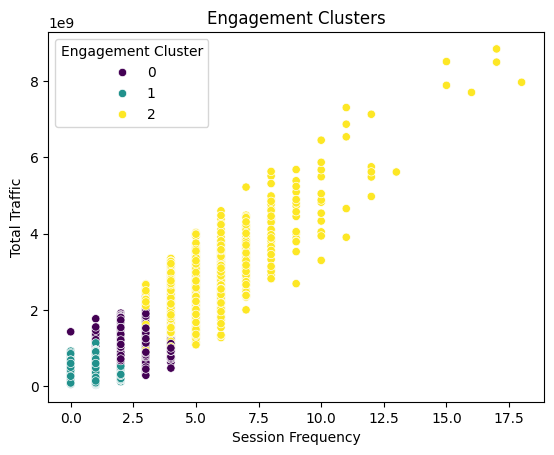

In [18]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Normalize engagement metrics
scaler = StandardScaler()
normalized_engagement_metrics = scaler.fit_transform(engagement_metrics)

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans.fit_predict(normalized_engagement_metrics)

# Add cluster labels to the data
engagement_metrics['Engagement Cluster'] = engagement_clusters

# Compute statistics for each cluster
cluster_stats = engagement_metrics.groupby('Engagement Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic': ['min', 'max', 'mean', 'sum']
})

print("Cluster Statistics:")
print(cluster_stats)

# Plot the clusters
sns.scatterplot(
    x=engagement_metrics['Session Frequency'], 
    y=engagement_metrics['Total Traffic'], 
    hue=engagement_metrics['Engagement Cluster'], 
    palette='viridis'
)
plt.xlabel('Session Frequency')
plt.ylabel('Total Traffic')
plt.title('Engagement Clusters')
plt.show()

Top 10 Most Engaged Users per Application:
Social Media:
MSISDN/Number
3.362632e+10    43374779.0
3.376054e+10    39783189.0
3.365973e+10    35412358.0
3.361489e+10    28294544.0
3.362578e+10    27135500.0
3.366716e+10    24247850.0
3.378632e+10    23974919.0
3.366907e+10    23800834.0
3.360313e+10    23077825.0
3.365849e+10    23000066.0
dtype: float64
Google:
MSISDN/Number
3.362632e+10    152191852.0
3.362578e+10    142307915.0
3.361489e+10    127973787.0
3.376054e+10    123223099.0
3.365973e+10    116516345.0
3.378632e+10    110254484.0
3.367588e+10    109860502.0
3.366716e+10    105032696.0
3.376127e+10     97089988.0
3.369876e+10     91935151.0
dtype: float64
Email:
MSISDN/Number
3.362632e+10    42418782.0
3.361489e+10    40788634.0
3.362578e+10    40633966.0
3.378632e+10    36310123.0
3.365973e+10    35999792.0
3.376054e+10    33693767.0
3.367588e+10    31514421.0
3.366546e+10    30417885.0
3.366716e+10    30335796.0
3.369879e+10    29059042.0
dtype: float64
YouTube:
MSISDN/Numbe

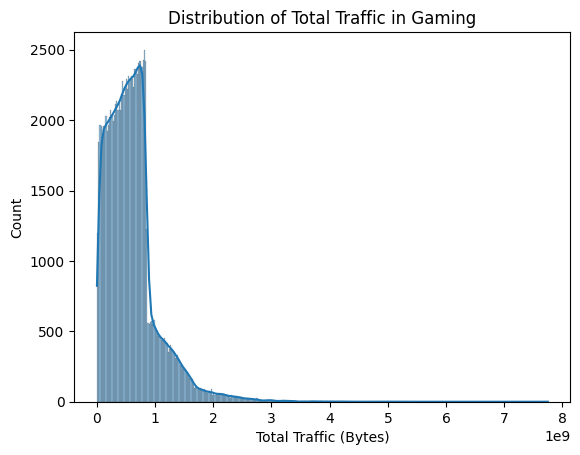

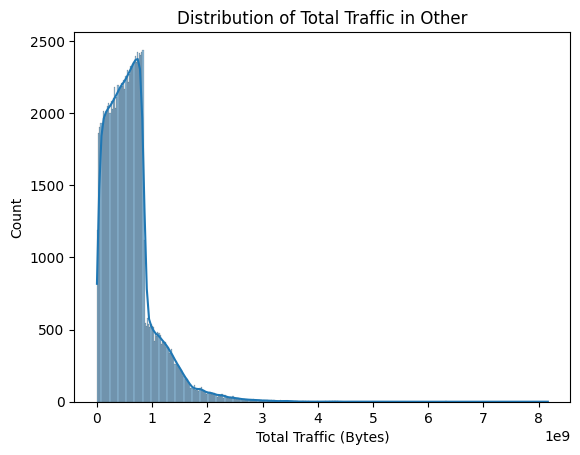

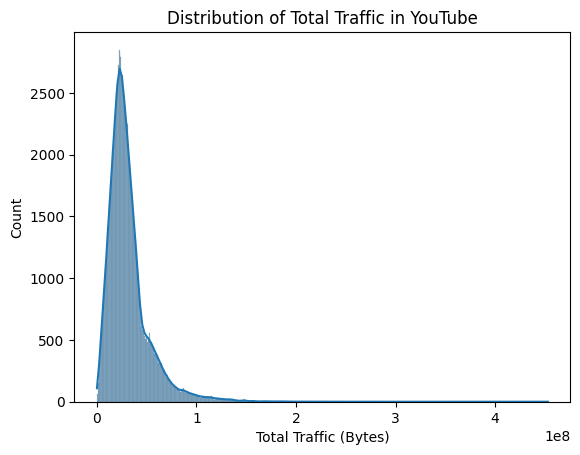

In [19]:
# Define the application data mapping
app_data = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'YouTube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}

# Re-run the code to ensure the error is resolved
application_traffic = {}
for app, fields in app_data.items():
    application_traffic[app] = (
        df.groupby('MSISDN/Number')[fields[0]].sum() + 
        df.groupby('MSISDN/Number')[fields[1]].sum()
    )

# Find the top 10 most engaged users per application
top_users_per_app = {}
for app, traffic in application_traffic.items():
    top_users_per_app[app] = traffic.sort_values(ascending=False).head(10)

print("Top 10 Most Engaged Users per Application:")
for app, top_users in top_users_per_app.items():
    print(f"{app}:")
    print(top_users)

# Plot the top 3 most used applications
top_3_apps = sorted(application_traffic, key=lambda k: application_traffic[k].sum(), reverse=True)[:3]

for app in top_3_apps:
    sns.histplot(application_traffic[app], kde=True)
    plt.title(f"Distribution of Total Traffic in {app}")
    plt.xlabel("Total Traffic (Bytes)")
    plt.show()

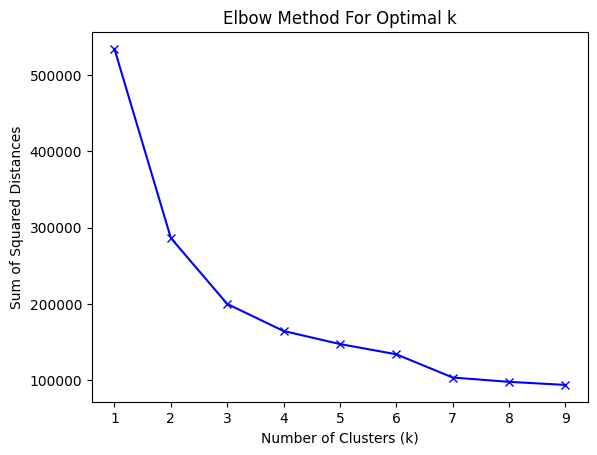

In [20]:
# Using the elbow method to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 10)  # Try different values of k from 1 to 9
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_engagement_metrics)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Add Task 3

In [21]:
# Convert relevant columns to numeric data types
numeric_columns = ['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate information per customer
customer_info = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',  # Average TCP retransmission
    'Avg RTT DL (ms)': 'mean',  # Average RTT
    'Handset Type': 'first',  # Handset type (assuming it's constant for each customer)
    'Avg Bearer TP DL (kbps)': 'mean'  # Average throughput
}).reset_index()

In [22]:
# Top values
top_tcp_values = df['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)
top_rtt_values = df['Avg RTT DL (ms)'].value_counts().head(10)
top_throughput_values = df['Avg Bearer TP DL (kbps)'].value_counts().head(10)

# Bottom values
bottom_tcp_values = df['TCP DL Retrans. Vol (Bytes)'].value_counts().tail(10)
bottom_rtt_values = df['Avg RTT DL (ms)'].value_counts().tail(10)
bottom_throughput_values = df['Avg Bearer TP DL (kbps)'].value_counts().tail(10)

# Most frequent values
frequent_tcp_values = df['TCP DL Retrans. Vol (Bytes)'].mode()
frequent_rtt_values = df['Avg RTT DL (ms)'].mode()
frequent_throughput_values = df['Avg Bearer TP DL (kbps)'].mode()

KeyboardInterrupt: 

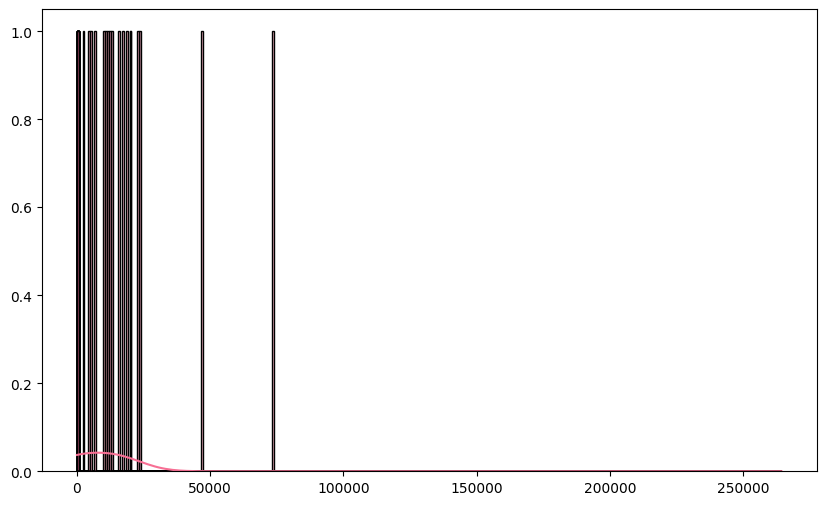

In [23]:
# Distribution of average throughput per handset type
throughput_per_handset = customer_info.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean()
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_info, x='Avg Bearer TP DL (kbps)', hue='Handset Type', kde=True)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Density')
plt.legend(title='Handset Type')
plt.show()

# Average TCP retransmission per handset type
tcp_retransmission_per_handset = customer_info.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean()

In [24]:
# Convert all object dtype columns to numeric (if needed)
customer_info = customer_info.apply(pd.to_numeric, errors='coerce')
# Check data types of all columns
print(customer_info.dtypes)

MSISDN/Number                  float64
TCP DL Retrans. Vol (Bytes)    float64
Avg RTT DL (ms)                float64
Handset Type                   float64
Avg Bearer TP DL (kbps)        float64
dtype: object


In [31]:
import numpy as np
# Prepare data for clustering
X = customer_info[['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)']].fillna(0)

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_info['Cluster'] = kmeans.fit_predict(X)

# Calculate the Euclidean distance between each user data point and the centroids of the clusters
customer_info['Engagement_Score'] = np.linalg.norm(X - kmeans.cluster_centers_[0], axis=1)
customer_info['Experience_Score'] = np.linalg.norm(X - kmeans.cluster_centers_[-1], axis=1)

In [32]:
# Calculate Satisfaction Score
customer_info['Satisfaction_Score'] = (customer_info['Engagement_Score'] + customer_info['Experience_Score']) / 2

# Report Top 10 Satisfied Customers
top_10_satisfied_customers = customer_info.nsmallest(10, 'Satisfaction_Score')

In [33]:
from sklearn.linear_model import LinearRegression

# Prepare features and target variable
X = customer_info[['Engagement_Score', 'Experience_Score']]
y = customer_info['Satisfaction_Score']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict the satisfaction score
y_pred = regression_model.predict(X_test)

In [34]:
# Prepare data for k-means clustering
X_scores = customer_info[['Engagement_Score', 'Experience_Score']].fillna(0)

# Perform k-means clustering with k=2
kmeans_scores = KMeans(n_clusters=2, random_state=42)
customer_info['Cluster_Scores'] = kmeans_scores.fit_predict(X_scores)

In [35]:
# Aggregate average satisfaction and experience scores per cluster
cluster_aggregate_scores = customer_info.groupby('Cluster_Scores')[['Satisfaction_Score', 'Experience_Score']].mean()

In [39]:
def export_to_postgres(df, table_name, uri):
    """
    Export DataFrame to a PostgreSQL table.
    
    Parameters:
    - df: DataFrame to export
    - table_name: Name of the table in the PostgreSQL database
    - uri: Connection URI for the PostgreSQL database
    """
    try:
        # Create the SQLAlchemy engine
        engine = create_engine(uri)
        
        # Export the DataFrame to the PostgreSQL database
        df.to_sql(table_name, con=engine, if_exists='replace', index=False)
        
        print("Export successful!")
        
    except Exception as e:
        print("Error:", e)

# Example usage:
# Define your PostgreSQL connection URI
postgres_uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

# Export DataFrame to PostgreSQL
export_to_postgres(customer_info, 'satisfaction_scores', postgres_uri)

Export successful!


In [40]:
satisfaction_scores_data = pd.read_sql("SELECT * FROM satisfaction_scores", postgres_uri)

# Display basic information about the satisfaction_scores
satisfaction_scores_data.info()
satisfaction_scores_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                106856 non-null  float64
 1   TCP DL Retrans. Vol (Bytes)  48524 non-null   float64
 2   Avg RTT DL (ms)              88320 non-null   float64
 3   Handset Type                 106856 non-null  object 
 4   Avg Bearer TP DL (kbps)      106856 non-null  float64
 5   Cluster                      106856 non-null  int64  
 6   Engagement_Score             106856 non-null  float64
 7   Experience_Score             106856 non-null  float64
 8   Satisfaction_Score           106856 non-null  float64
 9   Cluster_Scores               106856 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 8.2+ MB


,MSISDN/Number,TCP DL Retrans. Vol (Bytes),Avg RTT DL (ms),Handset Type,Avg Bearer TP DL (kbps),Cluster,Engagement_Score,Experience_Score,Satisfaction_Score,Cluster_Scores
0,3.360100e+10,NaN,46.0,Huawei P20 Lite Huawei Nova 3E,37.0,2,9.399991e+08,3.151801e+06,4.715755e+08,0
1,3.360100e+10,NaN,30.0,Apple iPhone 7 (A1778),48.0,2,9.399991e+08,3.151801e+06,4.715755e+08,0
2,3.360100e+10,NaN,NaN,undefined,48.0,2,9.399991e+08,3.151801e+06,4.715755e+08,0
3,3.360101e+10,1066.0,69.0,Apple iPhone 5S (A1457),204.0,2,9.399981e+08,3.150735e+06,4.715744e+08,0
4,3.360101e+10,9349630.0,57.0,Apple iPhone Se (A1723),20197.5,2,9.306495e+08,6.197856e+06,4.684237e+08,0
